In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

import os
import sys

import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api

from pylab import*
from scipy.io import wavfile

import soundfile as sf

In [37]:
import os
import sys

In [38]:
# df = pd.read_csv("perc_eda.csv",delimiter="|")
# len(df.columns)-1

In [39]:
# for i in range(10) :
#     pp.hist(df['v'+str(i)],label='v'+str(i))
# pp.legend()
# pp.show()

In [40]:
def get_binned_values(s1,nbins=10,do_fabs=True,normalize=True) :
    if do_fabs :
        s1s = fabs(s1)
    else :
        s1s = s1
    if normalize :
        s1s_scal = fabs(s1s)/float(np.max(s1s))

    # Bin over e.g. 5 bins and compute averages
    delta    = int(len(s1s_scal)/float(nbins))
    ni       = 0
    avg_vals = []
    while ni+delta < len(s1s_scal) :
        avg = np.mean(s1s_scal[ni:(ni+delta)])
        avg_vals.append(avg)
        ni  = ni+delta 
    avg = np.mean(s1s_scal[ni:-1])
    avg_vals.append(avg)

    return avg_vals

In [ ]:
def sample_amplitude(t,a,)

In [44]:
def process_sound(wav_file) :

    # Need to convert to 16 bits first.
    wav_fo = wav_file.replace(".wav","-2.wav")
    data, samplerate = sf.read(wav_file)
    sf.write(wav_fo, data, samplerate)

    sampFreq, snd = wavfile.read(wav_fo) # load the data
    #print(snd.dtype)
    #print(sampFreq)

    #print("Duration: "+str(snd.shape[0]/float(sampFreq)))
    
    dur_sam = snd.shape[0]
    # Let's keep it mono
    try :
        s1 = snd[:,0]
    except :
        os.system('rm "'+wav_fo+'"')
        return (0,0,0)

    # Plot the tone
    timeArray = arange(0, dur_sam, 1)
    timeArray = timeArray / float(sampFreq)
    timeArray = timeArray * 1000  #scale to milliseconds

    # plot(timeArray, s1, color='k')
    # ylabel('Amplitude')
    # xlabel('Time (ms)')

    # Do an FFT
    n = len(s1) 
    p = fft(s1) # take the fourier transform 

    nUniquePts = int(ceil((n+1)/2.0))
    p = p[0:nUniquePts]
    p = abs(p)

    p = p / float(n) # scale by the number of points so that
    # the magnitude does not depend on the length 
    # of the signal or on its sampling frequency  
    p = p**2  # square it to get the power 

    # multiply by two (see technical document for details)
    # odd nfft excludes Nyquist point
    if n % 2 > 0: # we've got odd number of points fft
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

    freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / float(n));
    #xlabel('Frequency (kHz)')
    #ylabel('Power (dB)')

    freqs = freqArray/1000
    pows  = 10*log10(p)

    avg_freq = np.average(freqs,weights=pows)
    max_freq = freqs[np.argmax(pows)]

    end_ind = int(len(timeArray))
    ts      = timeArray[0:end_ind]
    s1s     = s1[0:end_ind]

    try :
        p     = np.polyfit(ts,fabs(s1s),1)
        slope = p[0]
    except :
        slope = 0

    os.system('rm "'+wav_fo+'"')

    # Try normalizing these values.
    arrs = [max_freq/freqs[-1],avg_freq/freqs[-1],slope/s1s[s1s.argmax()]]

    # Get binned distributions of amplitude and frequency and
    # use those as variables.
    abin = get_binned_values(s1,nbins=20,do_fabs=True,normalize=True) 
    pbin = get_binned_values(pows,nbins=20,do_fabs=False,normalize=True) 

    #arrs.extend(abin)
    #arrs.extend(pbin)
    
    return (arrs,abin,pbin)

In [46]:
in_folder = "clusters/snare/0/"
fns   = []
abins = []
pbins = []
for f in os.listdir("clusters/snare/0/") :
    fn = in_folder + f
    arrs,abin,pbin = process_sound(fn)
    fns.append(f)
    abins.append(abin)
    pbins.append(pbin)

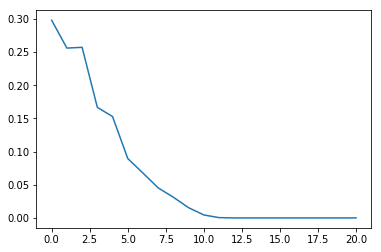

In [50]:
plt.plot(abins[3])

In [2]:
import pandas as pd
import pickle

In [3]:
df = pickle.load(open("snare.pickle","rb"))

In [7]:
for ii in df.iloc[240,:].tolist() :
    print(ii)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


27.41100550231758
21.141908974507714
23.946895792142403
27.761743208483807
25.781775787753144
26.907241309381497
24.243439442892107
26.560189370308954
25.975472048916245
14.752005724335845
24.00786647150248
24.598723280204634
30.169370478010485
29.536567706825345
23.503798535751763
26.301415472263457
20.851311796970826
22.059357650629448
16.696332783892004
18.865743175528916
23.709726253942595
17.007413117784225
15.466801398930414
22.046978644651055
6.044208161412737
17.609440721392453
25.79176671775464
24.735385464274163
24.720863231720852
20.794526304226245
25.669649774714234
22.228216584713817
23.664009159469572
18.00415454572611
19.315130782004044
21.124033761472237
13.889985706131299
24.15475020966726
15.410448647685744
17.112042573029186
26.36274472809913
21.806601398307013
21.209417572763197
10.512692193632292
15.352887680258608
15.393182648982531
26.55974265870384
23.20605005334951
16.26021598616089
23.616105894880324
25.1272018260951
23.35900325258024
18.77391490254624
19.5398

In [1]:
import pickle

In [4]:
kmeans = pickle.load(open("snare_kmeans.pickle","rb"))

In [9]:
kmeans.inertia_

1387440051.6184626